### Exploratory Data Analysis (EDA)

In [51]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Descargar última versión
path = kagglehub.dataset_download("mdsultanulislamovi/sleep-disorder-diagnosis-dataset")
print("Path to dataset files:", path)
print("Files in path:", os.listdir(path))

Path to dataset files: /home/guille/.cache/kagglehub/datasets/mdsultanulislamovi/sleep-disorder-diagnosis-dataset/versions/1
Files in path: ['Sleep_health_and_lifestyle_dataset.csv']


In [4]:
# Read and show dataset
file_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")
df = pd.read_csv(file_path)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Información general

In [5]:
df.shape # Dimensiones (374, 13)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.duplicated().sum() # No hay duplicados

np.int64(0)

#### Revisión por columnas

In [21]:
def show_object_col(col: str):
    print(f"\n{col.upper()}")
    print(f"Valores posibles: {len(df[col].unique())}")
    print(f"Distribución:\n{df[col].value_counts()}")

def show_int_col(col: str):
    print(f"\n{col.upper()}")
    print(f"Mínimo/a: {df[col].min()} // Máximo/a: {df[col].max()}")
    print(f"Media: {df[col].mean()}\nMediana: {df[col].median()}\nModa: {df[col].mode()[0]}\nDesviación: {df[col].std()}")

##### Numéricas

In [22]:
num_cols = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]
for col in num_cols:
    show_int_col(col)



AGE
Mínimo/a: 27 // Máximo/a: 59
Media: 42.18449197860963
Mediana: 43.0
Moda: 43
Desviación: 8.673133465547243

SLEEP DURATION
Mínimo/a: 5.8 // Máximo/a: 8.5
Media: 7.132085561497325
Mediana: 7.2
Moda: 7.2
Desviación: 0.7956567308898189

QUALITY OF SLEEP
Mínimo/a: 4 // Máximo/a: 9
Media: 7.31283422459893
Mediana: 7.0
Moda: 8
Desviación: 1.196955919733606

PHYSICAL ACTIVITY LEVEL
Mínimo/a: 30 // Máximo/a: 90
Media: 59.17112299465241
Mediana: 60.0
Moda: 60
Desviación: 20.83080365807167

STRESS LEVEL
Mínimo/a: 3 // Máximo/a: 8
Media: 5.385026737967914
Mediana: 5.0
Moda: 3
Desviación: 1.774526444198519

HEART RATE
Mínimo/a: 65 // Máximo/a: 86
Media: 70.16577540106952
Mediana: 70.0
Moda: 68
Desviación: 4.135675535112215

DAILY STEPS
Mínimo/a: 3000 // Máximo/a: 10000
Media: 6816.844919786096
Mediana: 7000.0
Moda: 8000
Desviación: 1617.915679133636


##### Categóricas

In [24]:
cat_cols = ["Gender", "Occupation", "BMI Category", "Blood Pressure"]
for col in cat_cols:
    show_object_col(col)


GENDER
Valores posibles: 2
Distribución:
Gender
Male      189
Female    185
Name: count, dtype: int64

OCCUPATION
Valores posibles: 11
Distribución:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

BMI CATEGORY
Valores posibles: 4
Distribución:
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

BLOOD PRESSURE
Valores posibles: 25
Distribución:
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
128/85     3
132/87     3
117/76     2
130/86     2
126/83     2
119/77     2
135/88     2
128/84     2
131/86     2
139/91     2
115/78     2
129/84     2
142/92     2
118/75

##### Target

In [26]:
target = "Sleep Disorder"
print(f"Valores posibles: {len(df[target])}")
print(f"Distribución:\n{df[target].value_counts()}")
print(f"None (Nan): {df[target].isna().sum()}")

Valores posibles: 374
Distribución:
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64
None (Nan): 219


In [61]:
df[num_cols].corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


<BarContainer object of 4 artists>

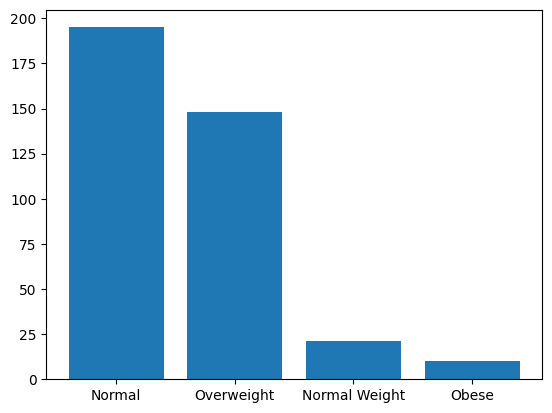

In [58]:
plt.bar(df["BMI Category"].value_counts().index, df["BMI Category"].value_counts().values)

### Resumen del dataset
 - Tiene 374 filas y 13 columnas
    * 7 numéricas
    * 4 categóricas
    * 1 target
    * 1 de ID
 - No hay ningún nulo en los features ni duplicados
 - El target (_Sleep Disorder_) puede ser: None (Nan), Insomnia o Sleep Apnea
 - La mayoría de personas no tiene ningún trastorno del sueño
 - Los features son bastante equilibrados, no hay sobrerrepresentación